# California House Prices EDA

Exploratory Data Analysis is an essential piece of any data analysis. In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. Here we will analyze house developments in California. All numbers represent small neighborhoods.

Exercise Goals & Objectives:
- Learn and prctice Pandas
- Practice Exploratory Data Analysis
- Practice Matplotlib
- Practice Linear Regression

Data Set:
- Using Pandas pd.read_csv() function read **housing.csv** file, saved in the datasets folder

# 1. Import all necessary libriaries

Hint: for linear regression you will need https://scikit-learn.org/stable/ 

In [2]:
# We have imported the functions you need for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Using Pandas read the data from the file

In [4]:
df = pd.read_csv("datasets/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Check for NaN values

In [6]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

# 4. The column "total_bedrooms" has NaN values, use fillna() and forward fill to fill the missing values

In [7]:
df.fillna(method="ffill", inplace=True)

# 5. Check for NaN values again, make sure you filled them

In [8]:
# Checking for Null Values again
pd.isnull(df).any() 

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

# Feature Engineering

Add more number of features which can help with the proper distribution and predicting better values in our model

# 6. Calculate Average Rooms per House and save the results in a new column "average_rooms"

In [10]:
df['average_rooms'] = df['total_rooms']/df['households']

# 7. Calculate Average Bedrooms per House and save the results in a new column "average_bedrooms"

In [11]:
df['average_bedrooms'] = df['total_bedrooms']/df['households']

# 8. Calculate Number of people per household and save the results in a new column "people_house"

In [12]:
df['people_house'] = df['population']/df['households']

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms,people_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


# 9. Plot population numbers as scatter plot, Latitude values on Y axis, Longtitude valueson X axis.

Hint: use plt.figure(figsize=(18,10))

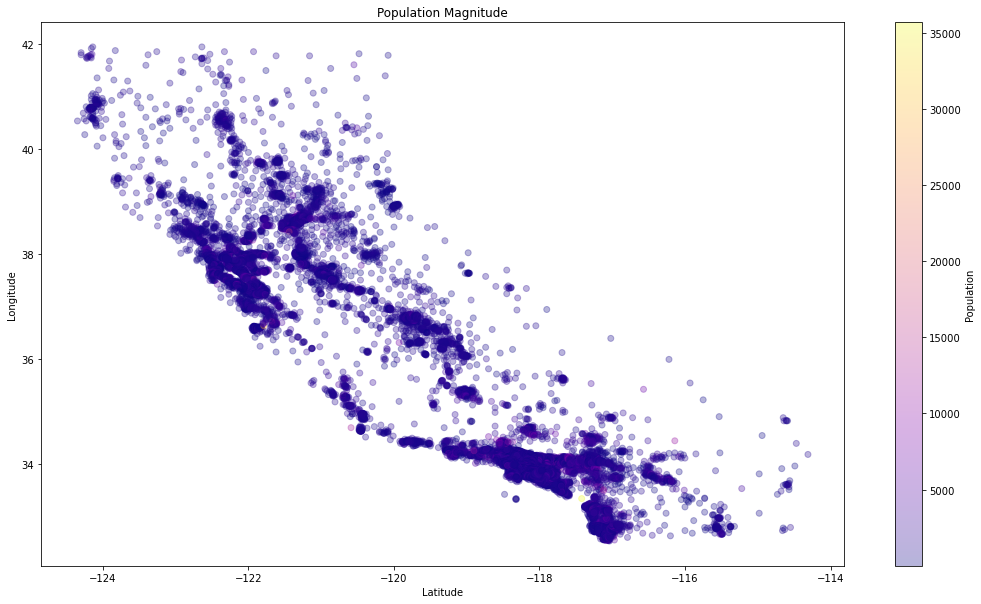

In [14]:
plt.figure(figsize=(18,10))
y_axis = df['latitude']
x_axis = df['longitude']
color = df['population']
plt.scatter(x_axis,y_axis,c=color, cmap='plasma', alpha = 0.3)
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar().set_label("Population")

# 10. Plot San Francisco and Los Angeles on your previous plot as X markers.

```
Hint: Use markersize=20 and marker="+" in the plt.plot() function to make the cities visable
San Francisco: Longtitude -122.4194 Latitide 37.7749
Los Angeles: Longtitude -118.2423 Latitide 34.50522
```

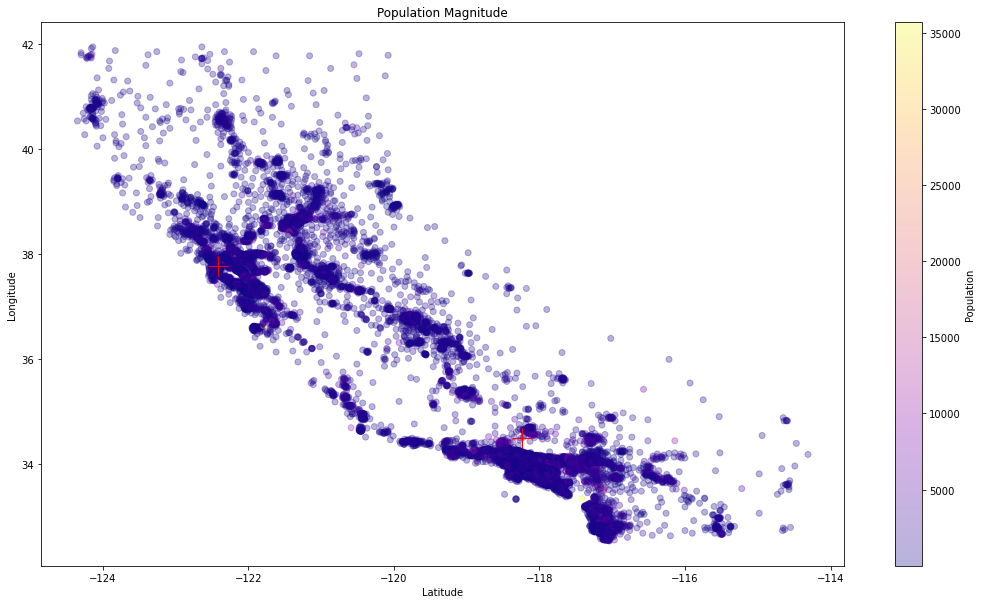

In [15]:
plt.figure(figsize=(18,10))
y_axis = df['latitude']
x_axis = df['longitude']
color = df['population']
plt.scatter(x_axis,y_axis,c=color, cmap='plasma', alpha = 0.3)
plt.plot(-122.4194,37.7749, color="r", markersize=20,marker="+");
plt.plot(-118.2423,34.50522, color="r", markersize=20,marker="+");
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar().set_label("Population")

# 11. Plot Average Distribution of Median Price of Housing in a Block as a histogram

```
Hint: Use seaborn style, plt.style.use('seaborn')
Explore all Matplotlib styles 
```
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

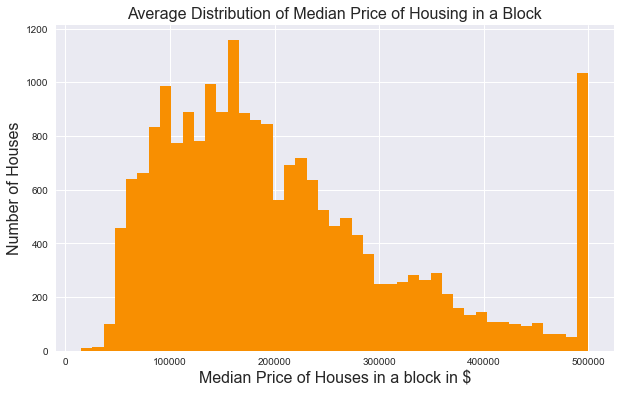

In [16]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16);

# 12. Get the number of neiborhoods based on "ocean_proximity"

In [18]:
proximity = df["ocean_proximity"].value_counts()
proximity

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# 13. Plot correlation between Median Price vs Average Number of Rooms

Hint: Use plt.style.use('dark_background')

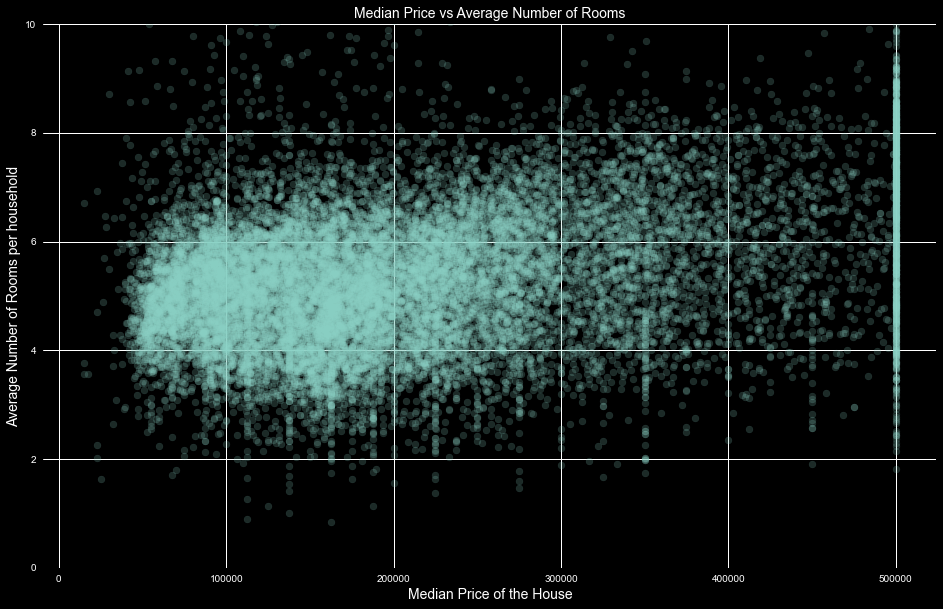

In [20]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
x = df['median_house_value']
y = df['average_rooms']
plt.scatter(x, y, alpha=0.2)
plt.ylim(0, 10)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Rooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Rooms', fontsize = 14);

# 14. Create a dummy variable inorder to categorize the ocean proximity attribute in the dataset, save the data with the variable "dummy"

Hint: pd.get_dummies(df["ocean_proximity"])

In [21]:
dummy = pd.get_dummies(df.ocean_proximity)
dummy.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


# 15. Concatinate the dummy dataset to the original df, the new dataset save with variable "project"

Hint: use axis = 1

In [22]:
project = pd.concat([df, dummy], axis = 1)

In [23]:
project.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,average_rooms,average_bedrooms,people_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,1,0


# 16. Drop the columns 'ocean_proximity' and 'ISLAND' from the project dataset

In [24]:
project.drop(['ocean_proximity', 'ISLAND'], axis=1, inplace=True)
project.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,average_rooms,average_bedrooms,people_house,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0


# 17. What would be dependant and independant variables for Linear Regression model?

Hint: Use capital X for independant variables andlower case y for dependant variable

In [26]:
X = project.drop('median_house_value', axis = 1)

In [27]:
y = project['median_house_value']

# 18. Using train_test_split function split X an y values into X_train, X_test, y_train, y_test

Hint: X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# 19. Initialize Linear Regression model using LinearRegression() function

In [30]:
model = LinearRegression()

# 20. Train your model using method fit()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

# 21. What is the score of your model

Hint: use method score(X_test, y_test)

In [32]:
model.score(X_test, y_test)

0.6570233434258999